In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mlflow
import mlflow.sklearn

print("done")

done

In [0]:
data = load_iris()
type(data)

Out[21]: sklearn.utils.Bunch

In [0]:
data.target

Out[22]: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
data.feature_names

Out[23]: ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
X=data.data
Y=data.target
type(X)

Out[24]: numpy.ndarray

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.25, random_state=0)

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
X= data.data[:, :2]
Y=data.target

In [0]:
x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5

In [0]:
!rm -r /dbfs/ci_challenge/mlflow/iris

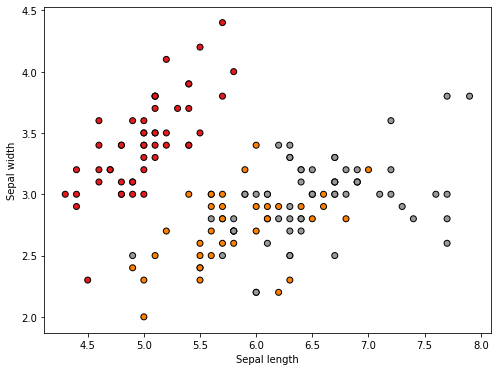

In [0]:
  plt.figure(2,figsize=(8,6))
  plt.clf()
  #plot traing points
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xtricks(())
plt.ytricks(())

fig=plt.figure(1,figsize=(8,6))
ax=Axes3D(fig,elev=-150,azim=110)
X_reduced=PCA(n_components=3).fit_transform(data.data)
ax_scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c=Y,cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title("First 3 dimenional PCA directions")
ax.set_x_label("1st eigenvectors")
ax.w_xaxis.set_ticklabels([])
ax.set_x_label("2nd eigenvectors")
ax.w_yaxis.set_ticklabels([])
ax.set_x_label("3rd eigenvectors")
ax.w_zaxis.set_ticklabels([])
fig.savefig("/dbfs/ci_challenge/mlflow/iris/iris.png")
plt.close(fig)
display()

In [0]:
with mlflow.start_run():
  dtc=DecisionTreeClassifier(random_state=10)
  dtc.fit(X_train,y_train)
  y_pred_class=dtc.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred_class)
  
  print(accuracy)
  
  mlflow.log_param("random_state",10) 
  mlflow.log_metric("accuracy",accuracy) #logs a single key-value metric
  mlflow.sklearn.log_model(dtc,"model")   #logs a local file as an artifact, optionally taking an artifact_path to place it in within the run’s artifact URI. Run artifacts can be organized into directories, so you can 
  modelpath="/dbfs/ci_challenge/mlflow/iris/model-%s-%f" %("decsion_tree",1)
  mlflow.sklearn.save_model(dtc,modelpath) #saving pkl file
  
  #mlflow.log_artifact("/dbfs/ci_challenge/mlflow/iris/iris.png")

/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
0.9736842105263158
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,

In [0]:
with mlflow.start_run():
  dtc=DecisionTreeClassifier(max_depth=1,random_state=10)
  dtc.fit(X_train,y_train)
  y_pred_class=dtc.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred_class)
  
  print(accuracy)
  
  mlflow.log_param("random_state",10)
  mlflow.log_metric("accuracy",accuracy)
  mlflow.sklearn.log_model(dtc,"model")
  modelpath="/dbfs/ci_challenge/mlflow/iris/model-%s-%f" %("decsion_tree",2)
  mlflow.sklearn.save_model(dtc,modelpath)
  #mlflow.log_artifact("iris1.png")

/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
0.5789473684210527
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,

In [0]:
i=3
with mlflow.start_run():
  knn=KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train,y_train)
  y_pred_class=knn.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred_class)
  
  print(accuracy)
  
  mlflow.log_param("n_neighbors",5)
  mlflow.log_metric("accuracy",accuracy)
  mlflow.sklearn.log_model(dtc,"model")
  modelpath="/dbfs/ci_challenge/mlflow/iris/model-%s-%f" %("knn",i)
  mlflow.sklearn.save_model(knn,modelpath)
  #mlflow.log_artifact("iris1.png")
  i=i+1

/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
0.9736842105263158
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,

In [0]:
with mlflow.start_run():
  knn=KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train,y_train)
  y_pred_class=knn.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred_class)
  
  print(accuracy)
  
  mlflow.log_param("n_neighbors",2)
  mlflow.log_metric("accuracy",accuracy)
  mlflow.sklearn.log_model(dtc,"model")
  modelpath="/dbfs/ci_challenge/mlflow/iris/model-%s-%f" %("knn",i)
  mlflow.sklearn.save_model(knn,modelpath)
  #mlflow.log_artifact("iris1.png")
  i=i+1

/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
0.9736842105263158
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,
/databricks/python/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'internal-dbis-databrick-ilb-huxv4enp3o0l-655314552.us-east-1.elb.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
 InsecureRequestWarning,

In [0]:
%sh
cd /dbfs/
ls

#!
FileStore
Filestore
Rlib
Rlibs
Users
ci122021
ci_challenge
cluster-logs
cpms_data.parquet
cpms_structure.json
cpms_structure.parquet
databricks
databricks-results
dbfs
epms_notice_print_response
estat_etl
etc
filestore
home
kafka-key-store-new.jks
local_disk0
ml
mlflow
mnt
mntdata
nta
root
stagemnt
tdss
tdss_adim
tmp
user

In [0]:
%sh
pwd
ls

/databricks/driver
conf
derby.log
eventlogs
ganglia
logs